In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [5]:
# load dataset

In [10]:
data=pd.read_csv('C:\\Users\\Choud\\OneDrive\\Desktop\\fastapi_mlmodels\\kindey stone urine analysis.csv')  

In [11]:
data.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [16]:
print(data.shape) # sahpe of dataset

(79, 7)


In [17]:
print(data.info()) # info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB
None


In [18]:
print("\nMissing Values:\n", data.isnull().sum()) # check missing values 


Missing Values:
 gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64


In [19]:
print(data.describe())

         gravity         ph         osmo       cond        urea       calc  \
count  79.000000  79.000000    79.000000  79.000000   79.000000  79.000000   
mean    1.018114   6.028481   612.848101  20.813924  266.405063   4.138987   
std     0.007239   0.724307   237.514755   7.938994  131.254550   3.260051   
min     1.005000   4.760000   187.000000   5.100000   10.000000   0.170000   
25%     1.012000   5.530000   413.000000  14.150000  160.000000   1.460000   
50%     1.018000   5.940000   594.000000  21.400000  260.000000   3.160000   
75%     1.023500   6.385000   792.000000  26.550000  372.000000   5.930000   
max     1.040000   7.940000  1236.000000  38.000000  620.000000  14.340000   

          target  
count  79.000000  
mean    0.430380  
std     0.498293  
min     0.000000  
25%     0.000000  
50%     0.000000  
75%     1.000000  
max     1.000000  


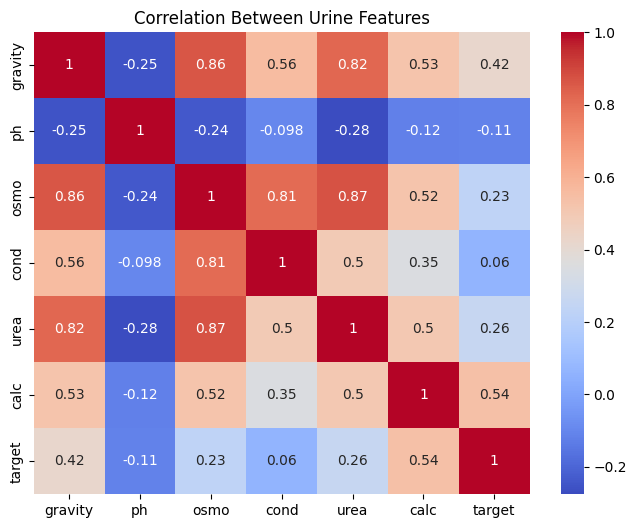

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Urine Features")
plt.show()


In [23]:
 #Outlier Detection (IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

gravity      0.0115
ph           0.8550
osmo       379.0000
cond        12.4000
urea       212.0000
calc         4.4700
target       1.0000
dtype: float64


In [24]:
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:", outliers)

Outliers per column: gravity    0
ph         3
osmo       0
cond       0
urea       0
calc       3
target     0
dtype: int64


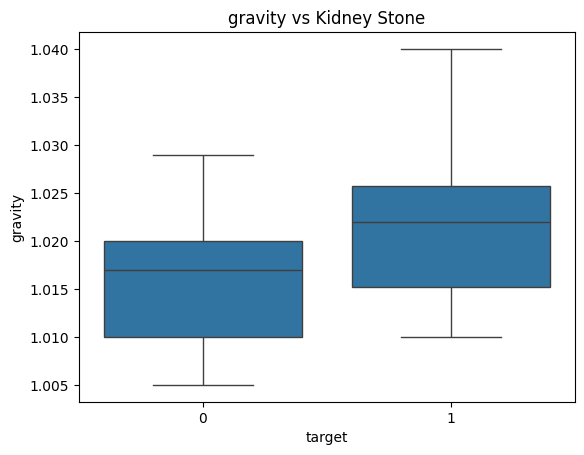

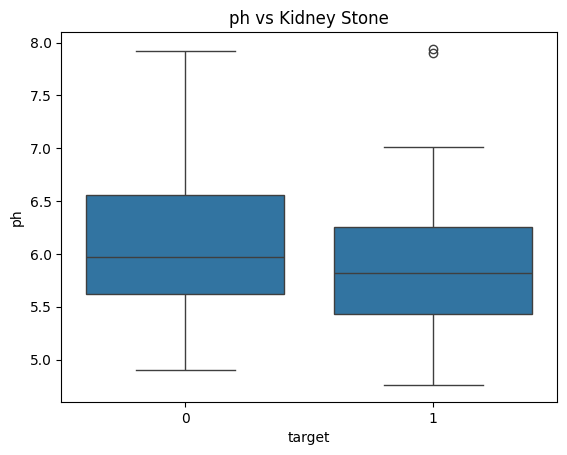

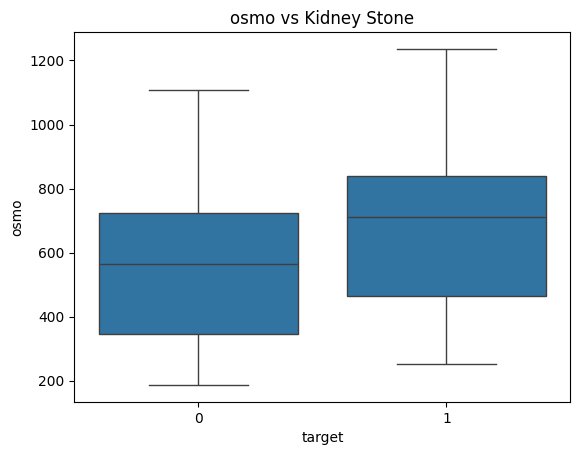

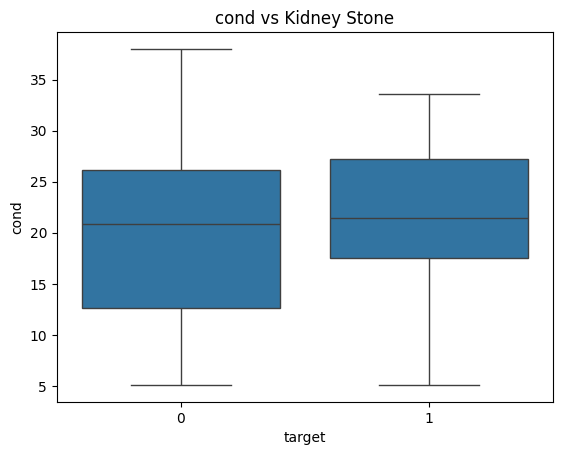

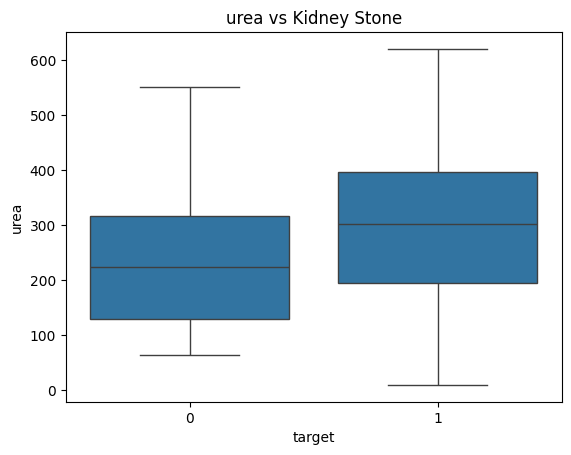

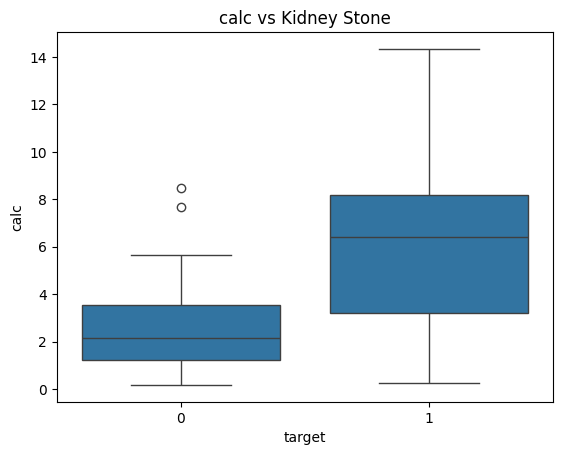

In [25]:
for col in data.columns[:-1]:
    plt.figure()
    sns.boxplot(x="target", y=col, data=data)
    plt.title(f"{col} vs Kidney Stone")
    plt.show()

In [26]:
X = data.drop("target", axis=1)
y = data["target"] # spliting the data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42)


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="rbf")
}

In [35]:
results = {}

for name, model in models.items():
    if name in ["Logistic Regression", "KNN", "SVM"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    results[name] = acc

    print(name)
    print("Accuracy:", acc)
    print(classification_report(y_test, preds))



Logistic Regression
Accuracy: 0.6875
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.50      0.60      0.55         5

    accuracy                           0.69        16
   macro avg       0.65      0.66      0.65        16
weighted avg       0.71      0.69      0.69        16

Decision Tree
Accuracy: 0.625
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.43      0.60      0.50         5

    accuracy                           0.62        16
   macro avg       0.60      0.62      0.60        16
weighted avg       0.67      0.62      0.64        16

Random Forest
Accuracy: 0.6875
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.50      0.40      0.44         5

    accuracy                           0.69        16
   macro avg       0.62      0

In [36]:
print("Best Model:", max(results, key=results.get))

Best Model: SVM


In [ ]:
# ===============================
# 10. Extract Best Model
# ===============================
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]

print("\nBest Model Selected:", best_model_name)
print("Best Accuracy:", best_accuracy)

best_model = models[best_model_name]

# ===============================
# 11. Retrain Best Model on Full Data
# ===============================
if best_model_name in ["Logistic Regression", "KNN", "SVM"]:
    # Scale full data
    X_scaled = scaler.fit_transform(X)
    best_model.fit(X_scaled, y)

    # Save scaler also
    import joblib
    joblib.dump(scaler, "scaler.pkl")

else:
    best_model.fit(X, y)

# 12. Save Best Model
# ===============================
import joblib
joblib.dump(best_model, "kidney_stone_best_model.pkl")

print("\nBest model and scaler saved successfully!")


In [39]:
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]

print("Best Model Selected:", best_model_name)
print("Best Accuracy:", best_accuracy)

Best Model Selected: SVM
Best Accuracy: 0.8125


In [51]:
import joblib

best_model = models[best_model_name]

# Retrain best model on full dataset
if best_model_name in ["Logistic Regression", "KNN", "SVM"]:
    X_scaled = scaler.fit_transform(X)
    best_model.fit(X_scaled, y)
    joblib.dump(scaler, "scaler.pkl")   # save scaler
else:
    best_model.fit(X, y)

# Save  model
joblib.dump(best_model, "kidney_stone_best_model.pkl")

print("\nBest model and scaler saved successfully!")



Best model and scaler saved successfully!
